# Can Neural Networks detect Dynamical Phase Transitions ?

Can the recurrent neural network protocol developed by Evert et. al \cite{Evert2018PRB} detect dynamical phase transitions ? There are several questions one can probe here:
\begin{enumerate}
\item Does the RNN correctly predict the phase transition? Quenches across the critical point have non-analyticities.
\item What do the Neurons learn? Can they predict the time at which the non-analyticities appear ?
\end{enumerate}

# Code to simulate NN Transverse Field Ising model
We have the following Hamiltonian
\begin{align}
H&=-J\sum_{i} \sigma_{i}^{x}\sigma_{i+1}^{x}-\Gamma\sum_{i}\sigma_{i}^{z}
\end{align}

Now we recall the main results for diagonalizing the TFIM. With the Jordan-Wigner Transform, we get
\begin{align}
H_{\eta}=J\sum_{i=1}^{L-1}\left(a_{\eta,i}-a_{\eta,i}^{\dagger}\right)\left(a_{\eta,i+1}+a_{\eta,i+1}^{\dagger}\right)+B\sum_{i=1}^{L}\left(2a_{\eta,i}^{\dagger}a_{\eta,i}-1\right)+\eta\left(a_{\eta,L}-a_{\eta,L}^{\dagger}\right)\left(a_{\eta,1}+a_{\eta,1}^{\dagger}\right)
\end{align}
where, $\eta=\pm 1$ denotes the even and odd parity sector. We will focus largely on $\eta=1$.

Now, we diagonalize the above Hamiltonian to obtain the dispersion,
\begin{align}
H_{\eta}&=\frac{N\Gamma}{2}+\sum_{q_{\eta}>0}\omega_{q_{\eta}}\left(\gamma_{\eta,q_{\eta}}^{\dagger}\gamma_{\eta,q_{\eta}}+\gamma_{\eta,-q_{\eta}}^{\dagger}\gamma_{\eta,-q_{\eta}}-1\right)\\
\gamma_{\eta,q_{\eta}}&=u_{q_{\eta}}b_{\eta,q{}_{\eta}}+iv_{q_{\eta}}b_{\eta,-q{}_{\eta}}^{\dagger}\\
    \omega_{q_{\eta}}&=2\sqrt{\Gamma^{2}-2\Gamma J\cos q_{\eta}+J^{2}} \\
|\phi_{\rm GS}\rangle&=\frac{1}{\left|v_{q_{\eta}}\right|}\prod_{q_{\eta}>0}\gamma_{q_{\eta}}\gamma_{-q_{\eta}}|0\rangle\\
 u_{q_{\eta}}=\cos\theta_{q_{\eta}},\ \  v_{q_{\eta}}=\sin\theta_{q_{\eta}}& \ \ \ \tan2\theta_{q_{\eta}}=\frac{J\sin q_{\eta}}{\Gamma-J\cos q_{\eta}}
\end{align}
with, $q_{\eta}=\left(2m+\frac{1}{2}\left(\eta-1\right)\right)\frac{\pi}{L}$.   with $\eta=1$

 \underline{Quench Dynamics}

Now, to discuss quench dynamics from $\Gamma_0 \rightarrow \Gamma$. Let the angle change from $\theta_{q0}\rightarrow \theta_q$. Defining $\alpha_q=\theta_q-\theta_{q0}$, we have the initial state as the ground state.
\begin{align}
|\psi_{\rm in}\rangle=\prod_{q>0}(\cos\alpha_q+i\sin\alpha_q \gamma^\dagger_q\gamma^\dagger_{-q})|\phi_{\rm GS}\rangle
\end{align}


The Loschmidt Echo is given as,
\begin{align}
\Lambda(t)=\left|\left(\langle \psi_{\rm in} |\exp (-iHt)|\psi_{\rm in}\rangle\right)\right|^2 = \prod_{q>0} [1-\sin^2(2\alpha_q)\sin^2(\omega_qt)]
\end{align}

For the DPT, non-analyticities show up at specific times,
\begin{align}
t=t^*\left(n+\frac{1}{2}\right)
\end{align}
with $t^*=\frac{2\pi}{\omega_{q^*}}$ and $\cos q^*=\frac{1+\Gamma_0 \Gamma/J_0J}{\Gamma_0/J_0 + \Gamma/J}$

In [5]:
import numpy as np
from scipy import linalg as LA
import scipy.sparse.linalg as spla
from scipy import optimize as OPT
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm 
from latex_envs.latex_envs import figcaption
from scipy.special import binom as bm
from sympy.physics.quantum.cg import CG
import numpy.matlib
import mod_TFIM_v0 as TFIM  #Import this module to calculate properties of TFIM
import os
import h5py
import types
#for Latex font on figures
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Roman']})
rc('text', usetex=True)

In [16]:
#list of functions in the module
listoffunctions=[getattr(TFIM, a) for a in dir(TFIM)  if isinstance(getattr(TFIM, a), types.FunctionType)]
for p in listoffunctions:
    print(p)

<function Log_Loschmidt_Echo_TFIM at 0x7fb7a66bbea0>
<function arrtostr at 0x7fb7a29c06a8>
<function save_data_LEt at 0x7fb7a29c0bf8>


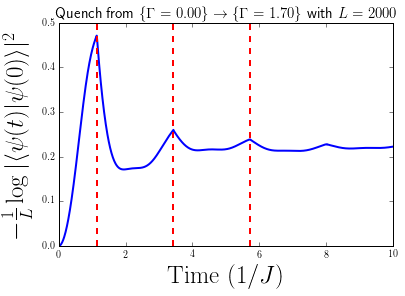

In [26]:
######################Parameter definitions###################
#Global definitions
L=2000 #System size
η=1 #parity sector
T=10.
dt=0.01
paramvals0=TFIM.TFIM_Ham_params(J=1,Γ=0)#iniitial state (ground state of Hamiltonian)
paramvalsf=TFIM.TFIM_Ham_params(J=1,Γ=1.7)#quench Hamiltonian
#define arrays
tarr=np.linspace(0,T,int((T-0+dt)/dt))
logΛarr=np.zeros(np.size(tarr))
for (t,p) in zip(tarr,range(np.size(tarr))):
    print(p, end='\r', flush=True)
    logΛarr[p]=TFIM.Log_Loschmidt_Echo_TFIM(t,paramvals0,paramvalsf,L,η)

plt.plot(tarr,(-1/L)*logΛarr,'-',linewidth=2)
plt.xlabel("${\\rm Time}\\  (1/J)$",fontsize=25)
plt.ylabel("$-\\frac{1}{L}\\log|\\langle\\psi(t)|\\psi(0)\\rangle|^2$",fontsize=25)
plt.title("Quench from $\\{\\Gamma=%.2f\\}\\rightarrow \\{\\Gamma=%.2f\\}$ with $L=%d$"%(paramvals0.Γ,paramvalsf.Γ,L),fontsize=15)
#TFIM.save_data_LEt(paramvals0,paramvalsf,logΛarr,tarr)

#analytical comparison
cosqstar=(1+(paramvals0.Γ/paramvals0.J)*(paramvalsf.Γ/paramvalsf.J))/(paramvals0.Γ/paramvals0.J +paramvalsf.Γ/paramvalsf.J)
ωqstar=2*np.sqrt(paramvalsf.Γ**2+paramvalsf.J**2-2*paramvalsf.Γ*paramvalsf.J*(cosqstar))
tstar=2*np.pi/ωqstar
for n in range(3):
    plt.axvline(tstar*(n+0.5),linestyle="dashed",color="red",linewidth=2)

# References

[<a id="cit-Evert2018PRB" href="#call-Evert2018PRB">1</a>] van Nieuwenburg Evert, Bairey Eyal and Refael Gil, ``_Learning phase transitions from dynamics_'', Phys. Rev. B, vol. 98, number , pp. 060301, Aug 2018.  [online](https://link.aps.org/doi/10.1103/PhysRevB.98.060301)

